## Графы

Некоторые данные удобно естественно хранить в виде графа:

- структура молекул
- 3D объекты (mesh)
- Социальные связи (соц. сети, цитирования ...)
...

### Свойства графов
* Направленность
* Цикличность / ацикличность
* Деревья

### Способы хранения графа

* Матрица связанности (adjacency matrix)
* CCO формат (coordinate list )
* ...

### Пакет для работы с графовыми данными

Пакет для работы с графовыми свертками:
https://pytorch-geometric.readthedocs.io/en/latest/

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.6 MB/s eta 0:00:00


### Визуализатор для графов:

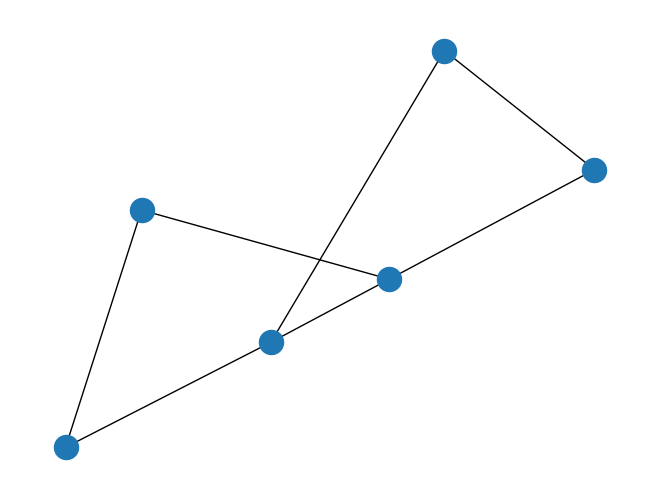

In [ ]:
import networkx as nx

G = nx.grid_graph([2,  3])
nx.draw(G)

Посмотрим на данные

Другие датасеты из Pytorch geometrics: https://pytorch-geometric.readthedocs.io/en/latest/cheatsheet/data_cheatsheet.html

Cкачаем датасет с молекулами:
https://arxiv.org/abs/1703.00564

In [ ]:
from torch_geometric.datasets import QM7b

dataset = QM7b("./")


Processing...
Done!


In [ ]:
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

QM7b(7211)
------------
Number of graphs: 7211
Number of features: 0
Number of classes: 14


In [ ]:
print("Graph #1",dataset[0])

Data(edge_index=[2, 25], edge_attr=[25], y=[1, 14], num_nodes=5)


В графе 5 узлов (num_nodes=5)

Каждый узел образует связь с каждым 5x5x2 (edge_index=[2, 25])

In [ ]:
dataset[0].edge_index

tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
         4],
        [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
         4]])

In [ ]:
dataset[0].edge_attr

tensor([36.8581,  2.8961,  2.8961,  2.8961,  2.8961,  2.8961,  0.5000,  0.2956,
         0.2956,  0.2956,  2.8961,  0.2956,  0.5000,  0.2956,  0.2956,  2.8961,
         0.2956,  0.2956,  0.5000,  0.2956,  2.8961,  0.2956,  0.2956,  0.2956,
         0.5000])

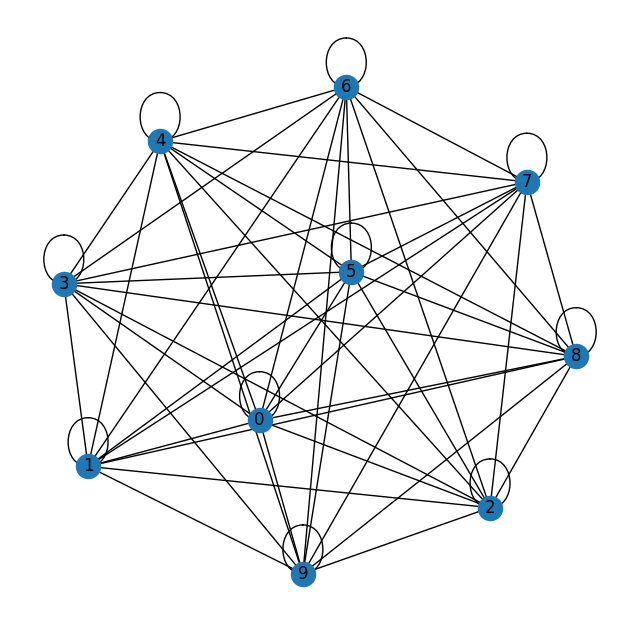

In [ ]:
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

graph = dataset[0]
g = to_networkx(graph, to_undirected=True)
plt.figure(figsize=(8,8))
plt.axis('off')
nx.draw_networkx(g)
"""
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=graph.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
"""
plt.show()

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
Data(edge_index=[2, 4], x=[3, 1])

Data(x=[2], edge_index=[2])

ССылки

https://towardsdatascience.com/graph-convolutional-networks-introduction-to-gnns-24b3f60d6c95

# Графовые свертки

https://pytorch-geometric.readthedocs.io/en/latest/notes/cheatsheet.html

[GCNConv](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GCNConv.html#torch_geometric.nn.conv.GCNConv)

[Semi-Supervised Classification with Graph Convolutional Networks](https://arxiv.org/abs/1609.02907)




In [ ]:
from torch_geometric.nn import GCNConv

#gcn = GCNConv(dataset.num_features, 3)
gcn = GCNConv(24, 3)
print(gcn)

GCNConv(24, 3)


In [ ]:
for name, p in gcn.named_parameters():
  print(name,p.shape)

bias torch.Size([3])
lin.weight torch.Size([3, 24])


Обычная свертка это линейный слой примененный к фрагменту изображения

$y = Wx = \sum_{i,j} w_{i,j}x_{i,j}$


В графовой свертке вместо соседних пикселей используются соседние вершины

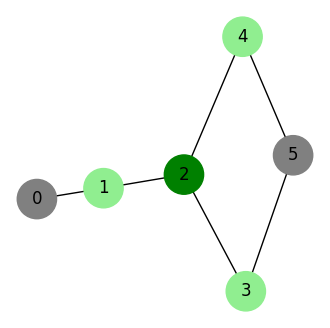

In [ ]:
import torch
from torch_geometric.data import Data

def show_graph(graph, colors = None):
  g = to_networkx(graph, to_undirected=True) #
  plt.figure(figsize=(4,4))
  plt.axis('off')
  #https://networkx.org/documentation/networkx-1.10/reference/drawing.html
  nx.draw_spring(g,
                with_labels=True,
                node_size=800,
                node_color=colors)
  plt.show()

edge_index = torch.tensor([[0, 1,  2, 2, 3, 4],
                           [1, 2,  3, 4, 5, 5]], dtype=torch.long)

x = torch.tensor([[0], [1], [2],[3],[4],[5]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)
data.validate(raise_on_error=True)

show_graph(data, ['gray','lightgreen','green','lightgreen','lightgreen', 'gray'])


Свертка будет применяться в каждой вершине. В каждой свертке будцт участвовать только соседние вершины

$N_i $ соседи i-той вершины.

Для вершины №2 ($ x_2 $) $ N_2 = [1,2,4,3] - номера вершин соседей включая ее саму $


Тггда можно былобы посчитать графовую свертку  по формуле:

$y = \sum_{i \in N} x_i*w$


где $x_i$ - эмбеддинг вершины, w - вектор - весов, один для всех вершин